In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
sample = pd.read_csv("sample_submission.csv")

In [3]:
train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [4]:
train.isna().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [5]:
train.shape,test.shape

((7000, 24), (3000, 23))

In [6]:
sample

,Employee_ID,Attrition_rate
0,TID_1,0.1588
1,TID_2,0.1424
2,TID_3,0.4758
3,TID_4,0.0846
4,TID_5,0.2388


In [7]:
data = pd.concat([train,test])
data = data.reset_index(drop = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                10000 non-null  object 
 1   Gender                     10000 non-null  object 
 2   Age                        9427 non-null   float64
 3   Education_Level            10000 non-null  int64  
 4   Relationship_Status        10000 non-null  object 
 5   Hometown                   10000 non-null  object 
 6   Unit                       10000 non-null  object 
 7   Decision_skill_possess     10000 non-null  object 
 8   Time_of_service            9804 non-null   float64
 9   Time_since_promotion       10000 non-null  int64  
 10  growth_rate                10000 non-null  int64  
 11  Travel_Rate                10000 non-null  int64  
 12  Post_Level                 10000 non-null  int64  
 13  Pay_Scale                  9988 non-null   floa

In [9]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Employee_ID,10000,10000,EID_15825,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,F,5842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,9427.0,NaN,NaN,NaN,39.675507,13.574856,19.0,27.0,38.0,52.0,65.0
Education_Level,10000.0,NaN,NaN,NaN,3.1994,1.065436,1.0,3.0,3.0,4.0,5.0
Relationship_Status,10000,2,Married,6461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hometown,10000,5,Lebanon,2953,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unit,10000,12,IT,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Decision_skill_possess,10000,4,Behavioral,2535,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time_of_service,9804.0,NaN,NaN,NaN,13.390657,10.311381,0.0,5.0,10.0,21.0,43.0
Time_since_promotion,10000.0,NaN,NaN,NaN,2.3786,1.14978,0.0,1.0,2.0,3.0,4.0


In [10]:
data.duplicated().sum()

0

In [11]:
data.isna().sum()

Employee_ID                     0
Gender                          0
Age                           573
Education_Level                 0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Time_of_service               196
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                      12
Compensation_and_Benefits       0
Work_Life_balance              16
VAR1                            0
VAR2                          794
VAR3                            0
VAR4                          954
VAR5                            0
VAR6                            0
VAR7                            0
Attrition_rate               3000
dtype: int64

In [12]:
data['Employee_ID'].value_counts()

EID_15825    1
EID_5610     1
EID_6893     1
EID_13475    1
EID_9456     1
            ..
EID_3798     1
EID_18047    1
EID_17829    1
EID_10009    1
EID_22397    1
Name: Employee_ID, Length: 10000, dtype: int64

In [13]:
data['Gender'].value_counts()

F    5842
M    4158
Name: Gender, dtype: int64

In [14]:
data['Gender']= data['Gender'].replace({"M":0 ,"F" : 1 })

In [15]:
data['Gender'].value_counts()

1    5842
0    4158
Name: Gender, dtype: int64

In [16]:
data['Age'].value_counts()

22.0    347
27.0    336
25.0    320
26.0    305
54.0    304
37.0    302
60.0    300
52.0    299
35.0    288
30.0    286
31.0    283
28.0    277
42.0    277
45.0    274
32.0    270
47.0    270
24.0    264
21.0    242
65.0    213
19.0    213
23.0    208
59.0    194
20.0    176
58.0    170
50.0    156
29.0    154
33.0    145
51.0    142
41.0    141
56.0    140
34.0    140
36.0    138
49.0    137
43.0    137
57.0    136
38.0    135
55.0    135
53.0    133
46.0    132
64.0    125
44.0    123
40.0    123
48.0    122
39.0    120
63.0    103
62.0    101
61.0     91
Name: Age, dtype: int64

In [17]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [18]:
data['Education_Level'].value_counts()

3    4063
4    3018
2     982
1     979
5     958
Name: Education_Level, dtype: int64

In [19]:
data['Education_Level'].isna().sum()

0

In [20]:
data['Relationship_Status'].value_counts()

Married    6461
Single     3539
Name: Relationship_Status, dtype: int64

In [21]:
data['Relationship_Status']= data['Relationship_Status'].replace({"Married":0 ,"Single" : 1 })

In [22]:
data['Relationship_Status'].isna().sum()

0

In [23]:
data['Hometown'].value_counts()

Lebanon        2953
Springfield    2484
Franklin       2181
Washington     1570
Clinton         812
Name: Hometown, dtype: int64

In [24]:
data['Unit'].value_counts()

IT                           1963
Logistics                    1648
Sales                        1389
Operarions                   1008
R&D                           991
Purchasing                    714
Accounting and Finance        679
Human Resource Management     513
Marketing                     319
Production                    292
Quality                       290
Security                      194
Name: Unit, dtype: int64

In [25]:
data['Decision_skill_possess'].value_counts()

Behavioral    2535
Analytical    2501
Directive     2488
Conceptual    2476
Name: Decision_skill_possess, dtype: int64

In [26]:
data['Decision_skill_possess']= data['Decision_skill_possess'].replace({"Behavioral":0 , "Analytical" : 1 , "Directive" : 2,
   "Conceptual":3})

In [27]:
data['Decision_skill_possess'].value_counts()

0    2535
1    2501
2    2488
3    2476
Name: Decision_skill_possess, dtype: int64

In [28]:
data['Time_of_service'].value_counts()

6.0     755
5.0     700
3.0     687
4.0     653
2.0     415
8.0     385
7.0     376
10.0    327
12.0    290
9.0     280
13.0    275
11.0    258
14.0    244
15.0    242
16.0    231
0.0     222
18.0    220
20.0    209
21.0    208
22.0    191
19.0    183
23.0    182
1.0     181
17.0    180
24.0    169
26.0    165
25.0    165
27.0    159
28.0    156
30.0    147
29.0    122
31.0    118
32.0    106
33.0    102
34.0     93
35.0     79
36.0     79
37.0     70
38.0     58
39.0     36
40.0     32
41.0     24
42.0     21
43.0      9
Name: Time_of_service, dtype: int64

In [29]:
data['Time_of_service'].isna().sum()

196

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time_of_service'>

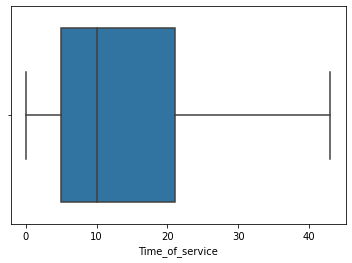

In [30]:
sns.boxplot(data['Time_of_service'])

In [31]:
data['Time_of_service']=data['Time_of_service'].fillna(data['Time_of_service'].mean())

In [32]:
data['Time_since_promotion'].value_counts()

2    2581
1    2574
3    2434
4    2187
0     224
Name: Time_since_promotion, dtype: int64

In [33]:
data['growth_rate'].value_counts()

64    208
51    206
23    205
66    204
59    200
56    200
68    198
54    197
32    196
70    196
34    195
27    194
45    193
29    192
57    191
30    190
60    189
42    189
52    188
39    188
24    187
37    187
50    185
48    185
49    184
21    184
73    183
67    183
58    183
61    182
31    180
33    179
55    179
69    177
36    177
72    177
22    175
20    175
28    175
41    174
71    173
44    173
25    173
40    172
46    171
43    168
62    167
38    166
53    163
35    161
63    159
26    158
47    158
74    156
65    152
Name: growth_rate, dtype: int64

In [34]:
data['growth_rate'].isna().sum()

0

In [35]:
data['Travel_Rate'].value_counts()

1    5499
0    3147
2    1354
Name: Travel_Rate, dtype: int64

In [36]:
data['Post_Level'].value_counts()

3    3469
2    2514
1    1516
4    1486
5    1015
Name: Post_Level, dtype: int64

In [37]:
data['Post_Level'].isna().sum()

0

In [38]:
data['Pay_Scale'].value_counts()

8.0     1964
6.0     1820
5.0     1640
4.0     1405
7.0     1163
9.0      703
2.0      383
3.0      366
10.0     314
1.0      230
Name: Pay_Scale, dtype: int64

In [39]:
data['Pay_Scale'].isna().sum()

12

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pay_Scale'>

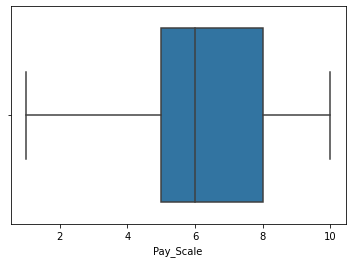

In [40]:
sns.boxplot(data['Pay_Scale'])

In [41]:
data['Pay_Scale']=data['Pay_Scale'].fillna(data['Pay_Scale'].mean())

In [42]:
data['Pay_Scale'].isna().sum()

0

In [43]:
data.isna().sum()

Employee_ID                     0
Gender                          0
Age                             0
Education_Level                 0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Time_of_service                 0
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                       0
Compensation_and_Benefits       0
Work_Life_balance              16
VAR1                            0
VAR2                          794
VAR3                            0
VAR4                          954
VAR5                            0
VAR6                            0
VAR7                            0
Attrition_rate               3000
dtype: int64

In [44]:
data['Work_Life_balance'].value_counts()

1.0    2951
3.0    2858
2.0    2287
4.0    1719
5.0     169
Name: Work_Life_balance, dtype: int64

In [45]:
data['Work_Life_balance'].isna().sum()

16

In [46]:
data['Work_Life_balance']=data['Work_Life_balance'].fillna(data['Work_Life_balance'].mean())

In [47]:
data['Work_Life_balance'].isna().sum()

0

In [48]:
data['VAR1'].value_counts()

3    6025
4    1941
2    1026
1     510
5     498
Name: VAR1, dtype: int64

In [49]:
data['VAR1'].isna().sum()

0

In [50]:
data['VAR2'].value_counts()

 0.7516    3582
-0.1048    2288
-0.9612    1469
-1.8176    1173
 1.6081     694
Name: VAR2, dtype: int64

In [51]:
data['VAR2'].isna().sum()

794

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='VAR2'>

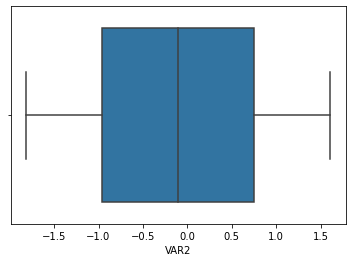

In [52]:
sns.boxplot(data['VAR2'])

In [53]:
data['VAR2']=data['VAR2'].fillna(data['VAR2'].mean())

In [54]:
data['VAR2'].isna().sum()

0

In [55]:
data['VAR3'].value_counts()

-0.4537    4755
 0.7075    3362
 1.8688     888
-1.6150     709
-2.7762     286
Name: VAR3, dtype: int64

In [56]:
data['VAR3'].isna().sum()

0

In [57]:
data['VAR4'].value_counts()

2.0    6369
1.0    1809
3.0     868
Name: VAR4, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='VAR4'>

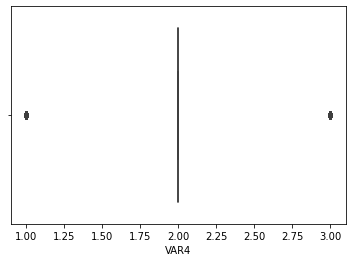

In [58]:
sns.boxplot(data['VAR4'])

In [59]:
data['VAR4']=data['VAR4'].fillna(data['VAR4'].median())

In [60]:
data['VAR4'].isna().sum()

0

In [61]:
data['VAR4'].value_counts()

2.0    7323
1.0    1809
3.0     868
Name: VAR4, dtype: int64

In [62]:
data['VAR5'].value_counts()

3    3926
2    2993
4    2073
1     687
5     321
Name: VAR5, dtype: int64

In [63]:
data['VAR5'].isna().sum()

0

In [64]:
data['VAR6'].value_counts()

8    3809
7    2509
6    1647
5    1283
9     752
Name: VAR6, dtype: int64

In [65]:
data['VAR6'].isna().sum()

0

In [66]:
data['VAR7'].value_counts()

3    5619
4    1921
5    1149
2     899
1     412
Name: VAR7, dtype: int64

In [67]:
data['VAR7'].isna().sum()

0

In [68]:
data.corr()

,Gender,Age,Education_Level,Relationship_Status,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Gender,1.000000,0.001573,-0.003408,0.002341,0.016410,-0.000001,0.014333,0.015286,-0.013034,-0.003305,0.003227,0.005631,-0.010860,0.011154,-0.009336,0.007869,-0.013586,-0.008673,0.003277,-0.028544
Age,0.001573,1.000000,-0.019002,0.001966,0.002752,0.883118,0.155851,-0.000473,0.010296,-0.012386,0.007798,0.000097,0.000649,0.005760,0.004957,-0.002020,-0.002193,-0.002902,0.003650,-0.015092
Education_Level,-0.003408,-0.019002,1.000000,0.005560,-0.012839,-0.023525,-0.004403,0.004248,-0.018508,0.003910,0.001539,-0.007082,-0.000978,-0.011315,-0.012551,-0.005233,0.002439,0.002964,0.010247,-0.008143
Relationship_Status,0.002341,0.001966,0.005560,1.000000,0.000396,0.001528,0.001298,0.006800,0.009556,0.018827,0.007682,-0.004210,0.006958,-0.007828,0.018140,0.015217,-0.011210,-0.006538,0.015175,0.009107
Decision_skill_possess,0.016410,0.002752,-0.012839,0.000396,1.000000,0.005887,-0.009563,0.011689,-0.002147,-0.012385,-0.013337,0.004239,-0.000648,-0.008171,0.009128,0.007125,0.008305,-0.015748,0.004252,0.028808
Time_of_service,-0.000001,0.883118,-0.023525,0.001528,0.005887,1.000000,0.145382,-0.004888,0.008973,-0.014121,0.011158,-0.001984,-0.000422,0.006428,0.003737,-0.004901,0.004604,-0.001045,-0.000978,-0.016211
Time_since_promotion,0.014333,0.155851,-0.004403,0.001298,-0.009563,0.145382,1.000000,0.000572,-0.014822,-0.008798,-0.002680,-0.002503,-0.005158,0.006355,0.001299,-0.009358,-0.002644,0.001764,0.000285,0.013880
growth_rate,0.015286,-0.000473,0.004248,0.006800,0.011689,-0.004888,0.000572,1.000000,0.008024,-0.008832,0.001848,-0.014704,-0.013294,0.000852,0.007201,0.027570,-0.006268,-0.008025,-0.013571,0.014247
Travel_Rate,-0.013034,0.010296,-0.018508,0.009556,-0.002147,0.008973,-0.014822,0.008024,1.000000,0.011363,-0.006099,-0.001752,0.010926,0.002783,-0.008601,0.002517,-0.004150,-0.009697,0.006319,-0.012608
Post_Level,-0.003305,-0.012386,0.003910,0.018827,-0.012385,-0.014121,-0.008798,-0.008832,0.011363,1.000000,0.024397,-0.002087,-0.006378,-0.007343,0.008104,-0.006047,0.002695,-0.000051,-0.005792,0.016402


In [69]:
num_col = data.select_dtypes(include=np.number)

In [70]:
num_col

,Gender,Age,Education_Level,Relationship_Status,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,1,42.000000,4,0,3,4.0,4,33,1,1,7.0,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,0,24.000000,3,1,1,5.0,4,36,0,3,6.0,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,1,58.000000,3,0,3,27.0,3,51,0,2,8.0,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,1,26.000000,3,1,0,4.0,3,56,1,3,8.0,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668
4,1,31.000000,1,0,3,5.0,4,62,1,3,2.0,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,32.000000,3,1,2,3.0,3,38,1,3,6.0,2.0,1,-0.1048,0.7075,1.0,4,7,4,NaN
9996,1,39.675507,2,1,3,10.0,2,57,1,4,9.0,1.0,3,0.7516,0.7075,3.0,4,8,3,NaN
9997,1,60.000000,4,1,1,35.0,1,69,0,2,9.0,3.0,3,-1.8176,-0.4537,2.0,4,8,4,NaN
9998,1,51.000000,1,0,0,23.0,1,30,0,2,6.0,1.0,5,0.7516,-0.4537,2.0,3,9,2,NaN


In [71]:
cat_col = data.select_dtypes(exclude=np.number).drop(columns=['Employee_ID','Hometown'])

In [72]:
cat_col

,Unit,Compensation_and_Benefits
0,IT,type2
1,Logistics,type2
2,Quality,type2
3,Human Resource Management,type2
4,Logistics,type3
...,...,...
9995,Sales,type2
9996,Marketing,type2
9997,Logistics,type3
9998,IT,type3


In [73]:
cat_col_processed = pd.get_dummies(cat_col)

In [74]:
cat_col_processed

,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9996,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9997,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
9998,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [75]:
scale = StandardScaler()
num_col_scaled = pd.DataFrame(scale.fit_transform(num_col.drop(columns=["Gender","Education_Level","Relationship_Status","Decision_skill_possess","Travel_Rate","Attrition_rate"])),columns=num_col.drop(columns=["Gender","Education_Level","Relationship_Status","Decision_skill_possess","Travel_Rate","Attrition_rate"]).columns)

In [76]:
num_col_scaled

,Age,Time_of_service,Time_since_promotion,growth_rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,0.176372,-0.919813,1.410253,-0.883936,-1.534614,0.472448,0.544574,1.095040,0.786163,1.892105,0.184956,1.240340,-1.817683,-0.271674
1,-1.189385,-0.821863,1.410253,-0.694634,0.173359,-0.010938,1.431238,-0.107112,-1.011747,-0.452050,0.184956,0.175853,-1.817683,-0.271674
2,1.390378,1.333033,0.540478,0.251872,-0.680627,0.955834,-1.228755,1.095040,-1.011747,-0.452050,2.150488,0.175853,0.766700,-0.271674
3,-1.037635,-0.919813,0.540478,0.567374,0.173359,0.955834,-1.228755,-0.107112,-1.910703,-0.452050,0.184956,0.175853,-0.094761,-0.271674
4,-0.658258,-0.821863,1.410253,0.945976,0.173359,-1.944481,0.544574,-2.511414,0.786163,-0.452050,0.184956,-0.888634,0.766700,-1.360110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.582382,-1.017763,0.540478,-0.568434,0.173359,-0.010938,-0.342091,-2.511414,-0.112792,0.719977,-1.780575,1.240340,-0.094761,0.816763
9996,0.000000,-0.332114,-0.329297,0.630474,1.027346,1.439220,-1.228755,-0.107112,0.786163,0.719977,2.150488,1.240340,0.766700,-0.271674
9997,1.542129,2.116631,-1.199072,1.387679,-0.680627,1.439220,0.544574,-0.107112,-1.910703,-0.452050,0.184956,1.240340,0.766700,0.816763
9998,0.859251,0.941234,-1.199072,-1.073237,-0.680627,-0.010938,-1.228755,2.297191,0.786163,-0.452050,0.184956,0.175853,1.628161,-1.360110


In [77]:
data_preprocessed = pd.concat([cat_col_processed,num_col_scaled,num_col[["Gender","Relationship_Status","Decision_skill_possess","Attrition_rate"]],data["Employee_ID"]],axis = 1)

In [78]:
data_preprocessed

,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,...,VAR3,VAR4,VAR5,VAR6,VAR7,Gender,Relationship_Status,Decision_skill_possess,Attrition_rate,Employee_ID
0,0,0,1,0,0,0,0,0,0,0,...,1.892105,0.184956,1.240340,-1.817683,-0.271674,1,0,3,0.1841,EID_23371
1,0,0,0,1,0,0,0,0,0,0,...,-0.452050,0.184956,0.175853,-1.817683,-0.271674,0,1,1,0.0670,EID_18000
2,0,0,0,0,0,0,0,0,1,0,...,-0.452050,2.150488,0.175853,0.766700,-0.271674,1,0,3,0.0851,EID_3891
3,0,1,0,0,0,0,0,0,0,0,...,-0.452050,0.184956,0.175853,-0.094761,-0.271674,1,1,0,0.0668,EID_17492
4,0,0,0,1,0,0,0,0,0,0,...,-0.452050,0.184956,-0.888634,0.766700,-1.360110,1,0,3,0.1827,EID_22534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0.719977,-1.780575,1.240340,-0.094761,0.816763,1,1,2,NaN,EID_22547
9996,0,0,0,0,1,0,0,0,0,0,...,0.719977,2.150488,1.240340,0.766700,-0.271674,1,1,3,NaN,EID_10066
9997,0,0,0,1,0,0,0,0,0,0,...,-0.452050,0.184956,1.240340,0.766700,0.816763,1,1,1,NaN,EID_7126
9998,0,0,1,0,0,0,0,0,0,0,...,-0.452050,0.184956,0.175853,1.628161,-1.360110,1,0,0,NaN,EID_4929


In [79]:
train_preprocessed = data_preprocessed[data_preprocessed['Attrition_rate'].notna()]

In [80]:
test_preprocessed = data_preprocessed[data_preprocessed['Attrition_rate'].isna()]

In [81]:
train_preprocessed.to_csv("train_preprocessed.csv", index = False)
test_preprocessed.to_csv("test_preprocessed.csv", index = False)